# <center>TP4 Arbres de Classification</center>
# <center>Alexandre Durand</center>
# <center>2017 / 2018</center>

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree, datasets
from sklearn.model_selection import cross_val_score

from tp_arbres_source import (rand_gauss, rand_bi_gauss, rand_tri_gauss,
                              rand_checkers, rand_clown, plot_2d,
                              frontiere, frontiere_new)

import seaborn as sns
from matplotlib import rc
plt.close('all')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 12,
          'font.size': 16,
          'legend.fontsize': 16,
          'text.usetex': False,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)

sns.set_context("poster")
sns.set_palette("colorblind")
sns.set_style("white")
_ = sns.axes_style()

## Génération artificielle de données
***

On peut utiliser de nouveau les fonctions qui génèrent les données des TP précédents (knn, perceptron notamment). Afin d'afficher quelques jeux de données, vous pouvez aussi utiliser ou modifier les fonctions plot_2d ou plot_2d_simple du  fichier tp_arbres_source.py.

In [2]:
np.random.seed(1)

n = 100
mu = [1., 1.]
sigma = [1., 1.]
rand_gauss(n, mu, sigma);

In [3]:
n1 = 20
n2 = 20
mu1 = [1., 1.]
mu2 = [-1., -1.]
sigma1 = [0.9, 0.9]
sigma2 = [0.9, 0.9]
data1 = rand_bi_gauss(n1, n2, mu1, mu2, sigma1, sigma2)

In [4]:
n1 = 50
n2 = 50
n3 = 50
mu1 = [1., 1.]
mu2 = [-1., -1.]
mu3 = [1., -1.]
sigma1 = [0.9, 0.9]
sigma2 = [0.9, 0.9]
sigma3 = [0.9, 0.9]
data2 = rand_tri_gauss(n1, n2, n3, mu1, mu2, mu3, sigma1, sigma2, sigma3)

In [5]:
n1 = 50
n2 = 50
sigma1 = 1.
sigma2 = 5.
data3 = rand_clown(n1, n2, sigma1, sigma2)

In [6]:
n1 = 114  # XXX : change
n2 = 114
n3 = 114
n4 = 114
sigma = 0.1
data4 = rand_checkers(n1, n2, n3, n4, sigma)

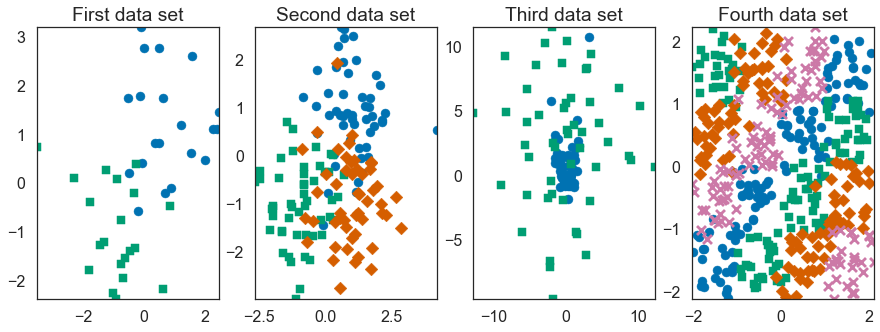

In [7]:
# Displaying labeled data

plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))
plt.subplot(141)
plt.title('First data set')
plot_2d(data1[:, :2], data1[:, 2], w=None)

plt.subplot(142)
plt.title('Second data set')
plot_2d(data2[:, :2], data2[:, 2], w=None)

plt.subplot(143)
plt.title('Third data set')
plot_2d(data3[:, :2], data3[:, 2], w=None)

plt.subplot(144)
plt.title('Fourth data set')
plot_2d(data4[:, :2], data4[:, 2], w=None)

---
# Arbres de décision - Algorithme CART
---

### Question 1.

Dans le cadre de la régression (i.e., quand on cherche à prédire une valeur numérique pour $Y$ et
non une classe), proposez une autre mesure d'homogénéité. Justifier votre choix.

> Regréssion : Fonctionnement identique, seul le critère de coût change, on minimise avec la variance comme mesure d’impureté.  

> $$H(D_n) = \overline{var}(D_n) = \frac{1}{\mid D_n \mid} \sum_{(\mathbf{x}_i, y_i) \in D_n} (y_i - \bar{y}_n)^{2}$$

### Question 2.

Simulez avec $rand\_checkers$ des échantillons de taille $n=456$ (attention à bien équilibrer les classes). Créez deux courbes qui donnent le pourcentage d'erreurs commises en fonction de la profondeur maximale de l'arbre (une courbe pour Gini, une courbe pour l'entropie). On laissera les autres paramètres à leur valeurs par défaut.

In [8]:
# Data (générées plus haut)
X = data4[:,:2]
y = data4[:,-1]
print("Shape of X :", X.shape, "\nShape of y :", y.shape)

Shape of X : (448, 2) 
Shape of y : (448,)


In [9]:
from sklearn import tree

# Critère pour Gini :
crit_list = ['gini', 'entropy']

# Profondeur
depth = [i for i in range(1, 22)]

# Calcul du score :
# /!\ ici on calcule le score sur les données qui nous ont servi à l'entrainement /!\
# /!\ C'est normal qu'on trouve des scores de 1 /!\
scores = dict()
for c in crit_list:
    scores_crit = np.empty(len(depth))
    for i, d in enumerate(depth):
        dt = tree.DecisionTreeClassifier(criterion=c, max_depth=d)
        dt.fit(X, y)
        scores_crit[i] = dt.score(X, y)
    scores[c] = scores_crit

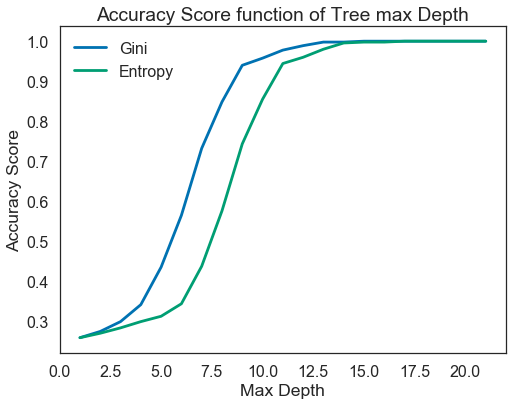

In [10]:
# Displaying
plt.close("all")
plt.figure(1, figsize=(8, 6))
plt.title('Accuracy Score function of Tree max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.plot(depth, scores['gini'], label='Gini')
plt.plot(depth, scores['entropy'], label='Entropy')
plt.legend();

### Question 3.

Afficher la classification obtenue en utilisant la profondeur qui minimise le pourcentage d'erreurs obtenues avec l'entropie (utiliser si besoin les fonctions $plot\_2d$ et $frontiere$ du fichier source).

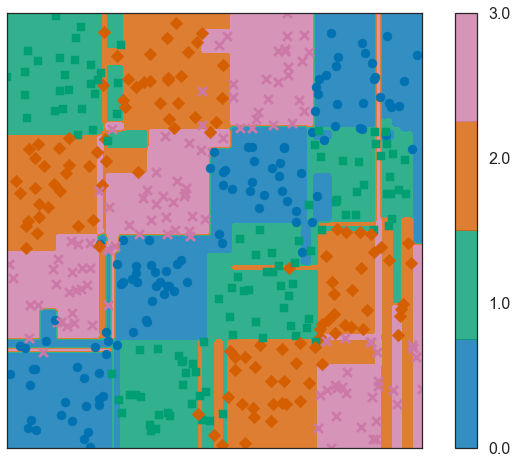

In [11]:
# Q3 Afficher les frontières obtenues avec l'arbre pour le meilleur paramètre

# Récupérer la meilleur profondeur pour Entropy
d = np.argmax(scores['entropy'])
best_depth_entropy = depth[d]

dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_depth_entropy)
dt.fit(X, y)
plt.figure(1, figsize=(12, 8))
frontiere_new(lambda x: dt.predict(x.reshape((1, -1))), X, y, step=100)

### Question 4.

Exporter un graphique de l'arbre obtenu à la question précédente en format pdf. On pourra par exemple utiliser la fonction $export\_graphviz$ du module tree.

In [12]:
# Q4.  Exporter la représentation graphique de l'arbre: Need graphviz installed
# ($ brew install graphviz)

tree.export_graphviz(dt, out_file="myTestTree.dot", filled=True)
import os
os.system("dot -Tpdf myTestTree.dot -o myTestTree.pdf")
!open myTestTree.pdf
os.system("evince myTestTree.pdf")

32512

### Question 5.

Créez $n = 160 = 40 + 40 + 40 + 40$ nouvelles données avec $rand\_checkers$. Pour les arbres de décision obtenus en question 2, calculer la proportion d'erreurs faites sur cet échantillon de test. Commenter.

In [13]:
# Données Train :
X_train = data4[:,:2]
y_train = data4[:,-1]

# Génération de nouvelles données Test
n1 = 40  # XXX : change
n2 = 40
n3 = 40
n4 = 40
sigma = 0.1
data5 = rand_checkers(n1, n2, n3, n4, sigma)
X_test = data5[:,:2]
y_test = data5[:,-1]

In [14]:
# Critère pour Gini :
crit_list = ['gini', 'entropy']

# Profondeur
depth = [i for i in range(1, 22)]

# Calcul du score :
# /!\ ici on calcule le score sur les données Test, /!\
# /!\   et non plus sur le train comme précédemment /!\
scores = dict()
for c in crit_list:
    scores_crit = np.empty(len(depth))
    for i, d in enumerate(depth):
        dt = tree.DecisionTreeClassifier(criterion=c, max_depth=d)
        dt.fit(X_train, y_train)
        scores_crit[i] = dt.score(X_test, y_test)
    scores[c] = scores_crit

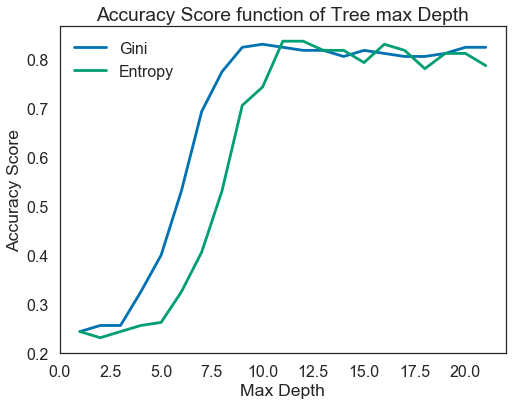

In [15]:
# Displaying
plt.close("all")
plt.figure(1, figsize=(8, 6))
plt.title('Accuracy Score function of Tree max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.plot(depth, scores['gini'], label='Gini')
plt.plot(depth, scores['entropy'], label='Entropy')
plt.legend();

### Question 6.

Reprendre la question 2 pour le dataset **zipcode**. Ce jeu de données est disponible dans le module $sklearn.datasets.$ On peut l'importer avec la fonction $load\_digits$ du dit module.

In [16]:
from sklearn.model_selection import train_test_split

# Import the digits dataset
digits = datasets.load_digits()

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                    test_size=0.5, random_state=42)

print("Shape of X :", X_train.shape)
print("Shape of y :", y_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of X : (898, 64)
Shape of y : (898,)
Shape of X_test : (899, 64)
Shape of y_test : (899,)


In [17]:
# Critère pour Gini :
crit_list = ['gini', 'entropy']

# Profondeur
depth = [i for i in range(1, 22)]

# Calcul du score sur Test:
scores = dict()
for c in crit_list:
    scores_crit = np.empty(len(depth))
    for i, d in enumerate(depth):
        dt = tree.DecisionTreeClassifier(criterion=c, max_depth=d)
        dt.fit(X_train, y_train)
        scores_crit[i] = dt.score(X_test, y_test)
    scores[c] = scores_crit

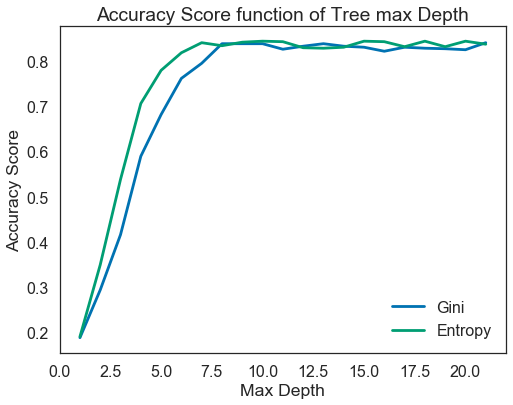

In [18]:
# Displaying
plt.close("all")
plt.figure(1, figsize=(8, 6))
plt.title('Accuracy Score function of Tree max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.plot(depth, scores['gini'], label='Gini')
plt.plot(depth, scores['entropy'], label='Entropy')
plt.legend();

---
# Méthodes de choix de paramètres - Sélection de modèle
---


### Question 7.

Utiliser la fonction $sklearn.cross\_validation.cross\_val\_score$ et tester la sur le jeu de données **zipcode** en faisant varier la profondeur de l'arbre de décision. On pourra se servir de cette fonction pour choisir la profondeur de l'arbre.

In [19]:
# Q7. estimer la meilleur profondeur avec un cross_val_score

from sklearn.model_selection import GridSearchCV

# Data
X = digits.data
y = digits.target

# Params
crit_list = ['gini', 'entropy']
depth = [i for i in range(1, 22)]
parameters = {'criterion': crit_list, 'max_depth': depth}

# Fit the Grid Search for DecisionTree
dt = tree.DecisionTreeClassifier() #criterion=c, max_depth=d)
grid = GridSearchCV(dt, parameters, cv=10, n_jobs=-1, verbose=0)
grid.fit(X, y)

# Get scores
param_criterion = grid.cv_results_['param_criterion']
mean_scores = grid.cv_results_['mean_test_score']
mean_scores_gini = mean_scores[param_criterion=='gini']
mean_scores_entropy = mean_scores[param_criterion=='entropy']

print("Best Candidate:")
print("   Best Score :", grid.best_score_)
print("   Best Parameters :", grid.best_params_)

Best Candidate:
   Best Score : 0.8391764051196439
   Best Parameters : {'criterion': 'entropy', 'max_depth': 14}


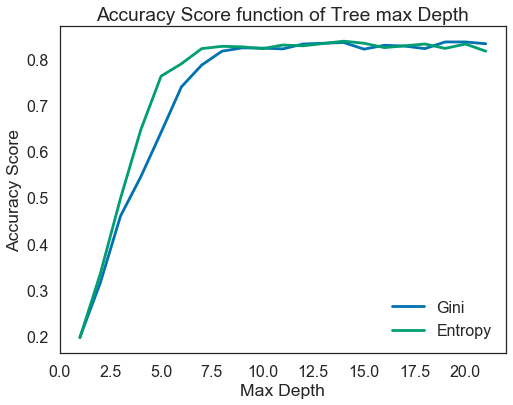

In [20]:
# Displaying
plt.close("all")
plt.figure(1, figsize=(8, 6))
plt.title('Accuracy Score function of Tree max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.plot(depth, mean_scores_gini, label='Gini')
plt.plot(depth, mean_scores_entropy, label='Entropy')
plt.legend();

### Question 8.

En s'inspirant de http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html afficher la courbe d'apprentissage (en : learning curve) pour les arbres de décisions sur le même jeu de données.

In [21]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure(figsize=(12, 8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


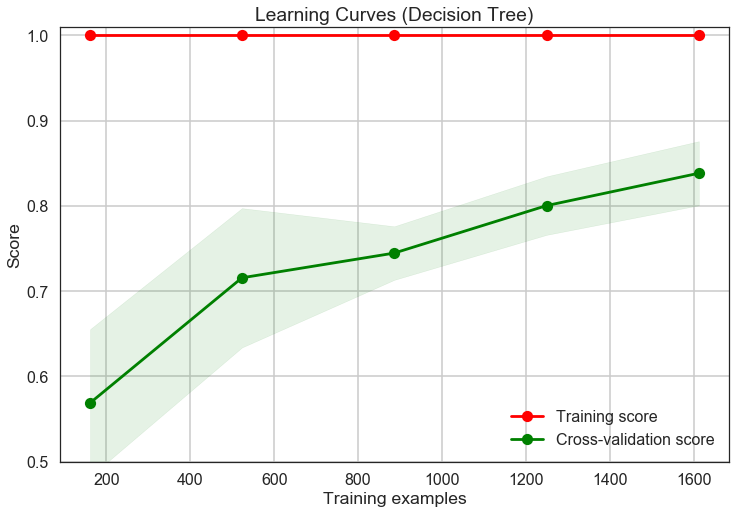

In [22]:
digits = datasets.load_digits()
X, y = digits.data, digits.target

title = "Learning Curves (Decision Tree)"
dt = tree.DecisionTreeClassifier()
plot_learning_curve(dt, title, X, y, ylim=(0.5, 1.01), cv=10, n_jobs=-1);

---
# Régression Logistique
---


Importer le paquet $sklearn.linear\_model$ qui contient en particulier la classe $LogisticRegression$ qui nous servira d'exemple dans la suite.
On pourra s'inspirer de l'exemple suivant pour utiliser de l'exemple : http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html


### Question 9.

Reprendre le jeu de données obtenu par $rand\_checkers$. Effectuer une régression logistique sur ce jeu de données et donner la proportion d'erreur commise en apprentissage. Comparer la performance par rapport à la méthode par arbre de décision. Commenter.

In [23]:
from sklearn.linear_model import LogisticRegression

# Data (générées plus haut)
X = data4[:,:2]
y = data4[:,-1]
#print("Shape of X :", X.shape, "\nShape of y :", y.shape)

# Logistic Regression
lr = LogisticRegression()  # default: fit_intercept=True
lr.fit(X, y)
print("Score LogisticRegression =", lr.score(X, y))

Score LogisticRegression = 0.16294642857142858


> La performance est très mauvaise ici comparée à la méthode par arbre de décision.
> La LogisticRegression sépare l'espace en plusieurs hyperplans or les données ici ne sont pas vraiment linéairement sépérables.

### Question 10.

À quoi correspond la variable $coef\_$ du modèle ? $intercept\_$ ?

In [24]:
print(lr.coef_.shape)
lr.coef_

(4, 2)


array([[-0.0339932 ,  0.01744474],
       [ 0.05028245,  0.0018003 ],
       [-0.02645629,  0.00680043],
       [ 0.00888511, -0.02609975]])

> $coef\_$ : array, shape (n_classes, n_features)  
  ==> Coefficient of the features in the decision function.

In [25]:
lr.intercept_

array([-1.08509095, -1.08822656, -1.08509239, -1.08623022])

> $intercept\_$ : array, (n_classes,)  
  ==> Intercept (a.k.a. bias) added to the decision function.

### Question 11.

Que vous retourne l'attribut $score$ ?

In [26]:
lr.score(X, y)

0.16294642857142858

> Function $score(X, y)$ :  
Returns the mean accuracy on the given data and labels.  


> In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

### Question 12.

Proposer trois manières d'appliquer la classification par régression logistique aux données issues de la base **zipcode**. Détailler votre démarche. Testez-en deux, par exemple en utilisant des courbes d'apprentissage comme ci-dessus.

Les trois méthodes sont :  
> 1) One vs One  
2) One vs All  (or One vs Rest)  
3) Modèle par défaut (car la modélisation de la logistique existe pour le multi-label)

Score for each fold :
 [0.92032967 0.86464088 0.94428969 0.93837535 0.90422535]
Accuracy: 0.914 (+/- 0.057)


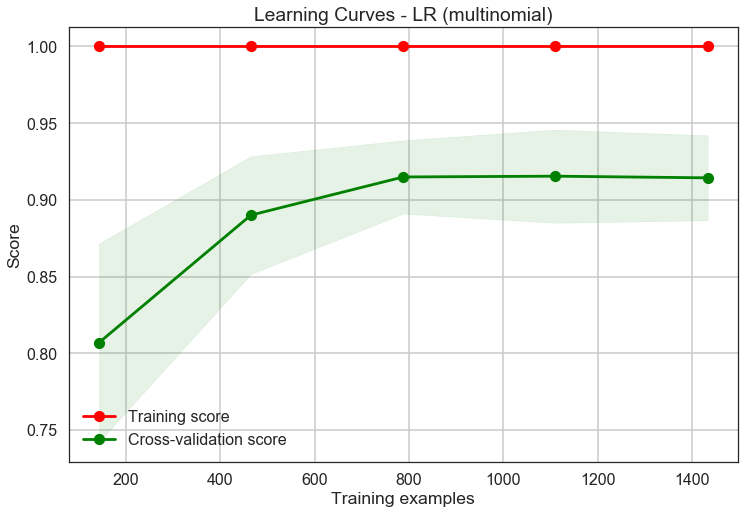

In [27]:
#####################
#### MULTINOMIAL ####
#####################

digits = datasets.load_digits()
X, y = digits.data, digits.target

# Logistic Regression
lr = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=2000)

# Score on CV
scores = cross_val_score(lr, X, y, cv=5)
print("Score for each fold :\n", scores)
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std()*2))

# Learning Curve
title = "Learning Curves - LR (multinomial)"
plot_learning_curve(lr, title, X, y, cv=5);

Score for each fold :
 [0.92307692 0.88121547 0.95264624 0.95798319 0.89577465]
Accuracy: 0.922 (+/- 0.061)


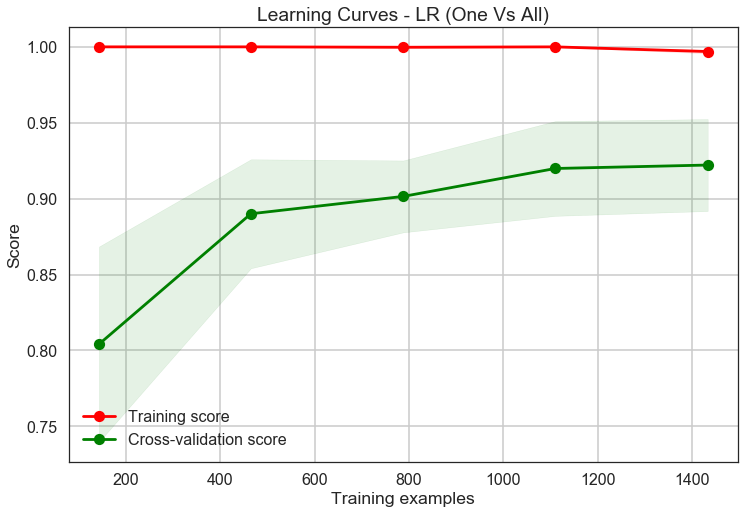

In [28]:
####################
#### ONE VS ALL ####
####################

digits = datasets.load_digits()
X, y = digits.data, digits.target

# Logistic Regression
lr = LogisticRegression(multi_class='ovr', solver='sag', max_iter=3000)

# Score on CV
scores = cross_val_score(lr, X, y, cv=5)
print("Score for each fold :\n", scores)
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std()*2))

# Learning Curve
title = "Learning Curves - LR (One Vs All)"
plot_learning_curve(lr, title, X, y, cv=5);